In [1]:
%cd /content/drive/MyDrive/autoencoder

/content/drive/MyDrive/autoencoder


In [2]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optics
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm.notebook import tqdm

In [3]:
#learning parameters
epochs=10
batch_size=64
lr=0.0001
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#image transformations
transform=transforms.Compose([
    transforms.ToTensor()
])


In [4]:
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

val_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

train_loader=DataLoader(
    train_data,
    batch_size=batch_size,

)

val_loader=DataLoader(
    val_data,
    batch_size=batch_size,

)

100%|██████████| 26.4M/26.4M [00:00<00:00, 116MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 8.22MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 61.0MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.72MB/s]


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        # Encoder
        self.enc1 = nn.Linear(in_features=784, out_features=512)
        self.enc2 = nn.Linear(in_features=512, out_features=32)

        # Decoder
        self.dec1 = nn.Linear(in_features=32, out_features=512)
        self.dec2 = nn.Linear(in_features=512, out_features=784)

    def forward(self, x):
        # Encoding
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))

        # Decoding
        x = F.relu(self.dec1(x))
        x = torch.sigmoid(self.dec2(x))
        return x

# Use this if you have already defined a device (like device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model = Autoencoder().to(device)
print(model)


Autoencoder(
  (enc1): Linear(in_features=784, out_features=512, bias=True)
  (enc2): Linear(in_features=512, out_features=32, bias=True)
  (dec1): Linear(in_features=32, out_features=512, bias=True)
  (dec2): Linear(in_features=512, out_features=784, bias=True)
)


In [9]:
criterion=nn.MSELoss()
optimizer=optics.Adam(model.parameters(),lr=lr)

In [17]:
def fit(model, dataloader, optimizer, criterion, device, train_data):
    model.train()
    running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data) / dataloader.batch_size)):
        data, _ = data
        data = data.to(device)
        data = data.view(data.size(0), -1)

        optimizer.zero_grad()
        reconstruction = model(data)
        loss = criterion(reconstruction, data)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()

    train_loss = running_loss / len(dataloader.dataset)
    return train_loss


def validate(model, dataloader, criterion, device, val_data, epoch):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data) / dataloader.batch_size)):
            data, _ = data
            data = data.to(device)
            batch_size = data.size(0)
            data = data.view(batch_size, -1)

            reconstruction = model(data)
            loss = criterion(reconstruction, data)
            running_loss += loss.item()

            if i == int(len(val_data) / dataloader.batch_size) - 1:
                num_rows = 8
                both = torch.cat((
                    data.view(batch_size, 1, 28, 28)[:num_rows],
                    reconstruction.view(batch_size, 1, 28, 28)[:num_rows]
                ))
                save_image(both.cpu(), f"output{epoch}.png", nrow=num_rows)
                output = plt.imread(f"output{epoch}.png")
                plt.imshow(output)
                plt.axis("off")
                plt.show()

    val_loss = running_loss / len(dataloader.dataset)
    return val_loss


Epoch 1 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

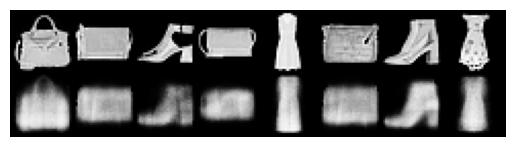

Train Loss: 0.000345
Val Loss: 0.000317
Epoch 2 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

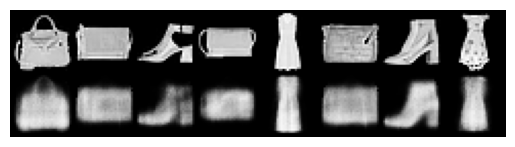

Train Loss: 0.000298
Val Loss: 0.000286
Epoch 3 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

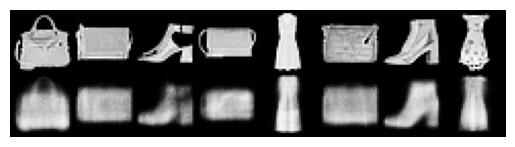

Train Loss: 0.000271
Val Loss: 0.000261
Epoch 4 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

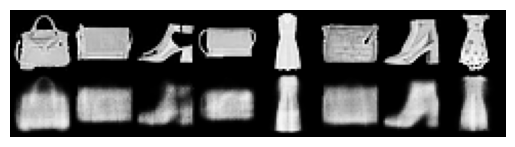

Train Loss: 0.000249
Val Loss: 0.000243
Epoch 5 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

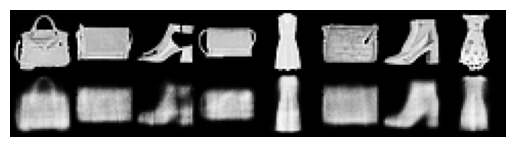

Train Loss: 0.000233
Val Loss: 0.000229
Epoch 6 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

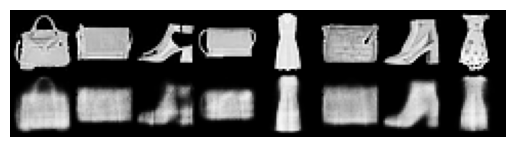

Train Loss: 0.000222
Val Loss: 0.000220
Epoch 7 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

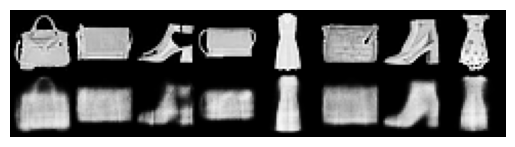

Train Loss: 0.000213
Val Loss: 0.000213
Epoch 8 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

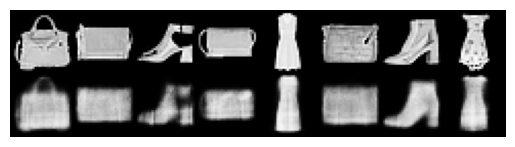

Train Loss: 0.000207
Val Loss: 0.000207
Epoch 9 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

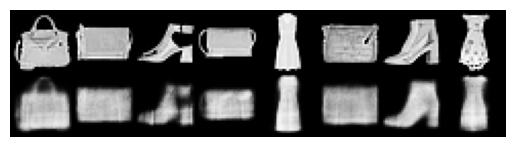

Train Loss: 0.000202
Val Loss: 0.000202
Epoch 10 of 10


  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

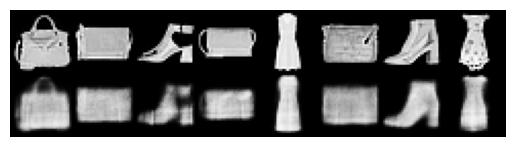

Train Loss: 0.000197
Val Loss: 0.000198


In [19]:
train_loss = []
val_loss = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")

    train_epoch_loss = fit(model, train_loader, optimizer, criterion, device, train_data)
    val_epoch_loss = validate(model, val_loader, criterion, device, val_data, epoch)

    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)

    print(f"Train Loss: {train_epoch_loss:.6f}")
    print(f"Val Loss: {val_epoch_loss:.6f}")
